In [ ]:
# י שיעור $3$: רגרסיה לוגיסטית ($Logistic\ Regression$) י  

י לאחר שלמדנו על סיווג באמצעות רגרסיה לינארית, נלמד עכשיו לעומק שיטה מדויקת ומתאימה יותר – רגרסיה לוגיסטית. י  

⸻

## י מדוע צריך רגרסיה לוגיסטית? י  

י כפי שראינו קודם, כאשר אנחנו מנסים לסווג נתונים בעזרת רגרסיה לינארית, מתקבלים לעיתים ערכים גדולים מ-$1$ או קטנים מ-$0$, שאינם הגיוניים כהסתברויות. י  

י רגרסיה לוגיסטית פותרת את הבעיה הזאת באמצעות מודל הסתברותי מיוחד, שמבטיח שהניבויים תמיד יהיו בין $0$ ל-$1$. י  

⸻

## י מודל הרגרסיה הלוגיסטית י  

י מודל רגרסיה לוגיסטית מניח שההסתברות שהתצפית $X$ שייכת לקטגוריה $1$ נתונה על ידי פונקציית הסיגמואיד ($Sigmoid$): י  

$$
P(Y=1|X=x) = \frac{e^{\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p}}{1 + e^{\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p}}
$$

י בקצרה, ניתן לכתוב זאת כך: י  

$$
P(Y=1|X=x) = \frac{e^{\beta^T x}}{1 + e^{\beta^T x}}
$$

י כאשר: י  
- י $Y$ – משתנה תגובה בינארי ($0$ או $1$) י  
- י $x = (x_1, x_2, \dots, x_p)$ – תכונות י  
- י $\beta = (\beta_0, \beta_1, \dots, \beta_p)$ – מקדמים י  

י פונקציית הסיגמואיד מחזירה תמיד ערכים בטווח $(0,1)$: י  
- י ערך גדול של $\beta^T x$ ייתן הסתברות קרובה ל-$1$. י  
- י ערך קטן שלילי של הביטוי ייתן הסתברות קרובה ל-$0$. י  

⸻

## י הצגה גרפית של פונקציית הסיגמואיד: י  

י פונקציית הסיגמואיד ($Sigmoid$) נראית כך: י  

$$
f(z) = \frac{1}{1 + e^{-z}}
$$

- י הפונקציה מוגבלת בין $0$ ל-$1$. י  
- י כאשר $z = 0$, הפונקציה היא בדיוק $0.5$. י  
- י כאשר $z \rightarrow \infty$, הפונקציה מתקרבת ל-$1$. י  
- י כאשר $z \rightarrow -\infty$, הפונקציה מתקרבת ל-$0$. י  

י נציג ויזואלית את פונקציית הסיגמואיד: י  

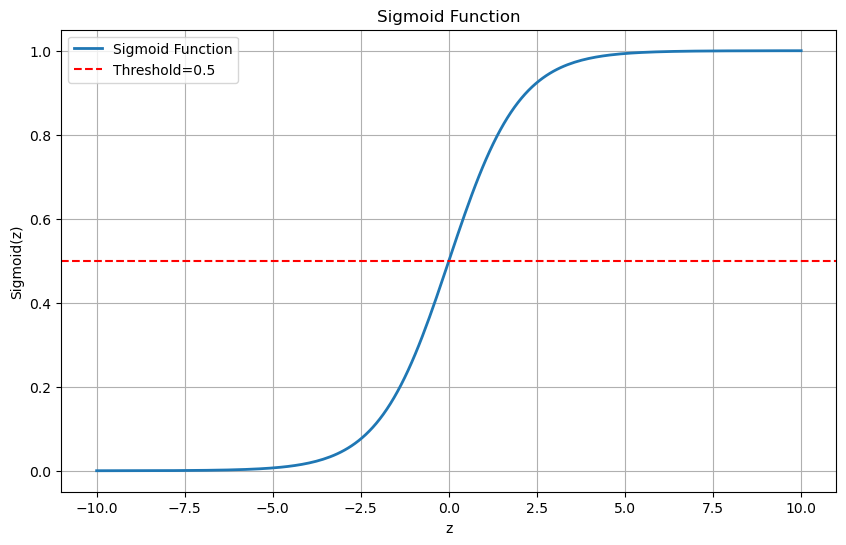

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# פונקציית הסיגמואיד
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# טווח ערכי z
z = np.linspace(-10, 10, 200)

# חישוב ערכי הסיגמואיד
sigmoid_values = sigmoid(z)

# הצגה גרפית
plt.figure(figsize=(10,6))
plt.plot(z, sigmoid(z), label='Sigmoid Function', linewidth=2)
plt.axhline(0.5, color='red', linestyle='--', label='Threshold=0.5')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
הסבר לגרף פונקציית הסיגמואיד:
	•	ציר ה-z מייצג את הערך הלינארי (\beta^T x).
	•	הערכים על הציר האנכי מייצגים את ההסתברות להיות שייך לקבוצה (ערכים בין 0 ל-1).
	•	הקו האדום (Threshold=0.5) הוא הסף המקובל בדרך כלל לקבלת החלטות בסיווג בינארי.

⸻

איך מחליטים על הסיווג בפועל?

ברגרסיה לוגיסטית, ההחלטה מבוססת על הסף 0.5:
	•	אם P(Y=1|X) > 0.5, התצפית מסווגת ל-Class 1.
	•	אם P(Y=1|X)\leq 0.5, התצפית מסווגת ל-Class 0.

פונקציית ההחלטה במודל הרגרסיה הלוגיסטית היא:

\beta_0 + \beta_1 x_1 + \dots + \beta_p x_p = 0

⸻

היתרונות של רגרסיה לוגיסטית:
	•	תוצאות הגיוניות: הניבויים תמיד נמצאים בין 0 ל-1, ומפורשים כהסתברויות.
	•	פשטות: קל לפרש את המקדמים.
	•	יעילות חישובית: המודל מהיר לחישוב.

החסרונות של השיטה:
	•	מניחה גבול החלטה לינארי (קו ישר, מישור וכו’). לכן לא תמיד יעילה כשקיימים גבולות לא לינאריים מורכבים.
	•	עלולה להיות רגישה לרעש או לתצפיות חריגות (outliers).

⸻

דוגמה מעשית עם רגרסיה לוגיסטית:

נראה כעת דוגמה מעשית ויזואלית לשימוש ברגרסיה לוגיסטית על אותם נתונים שהצגנו קודם:

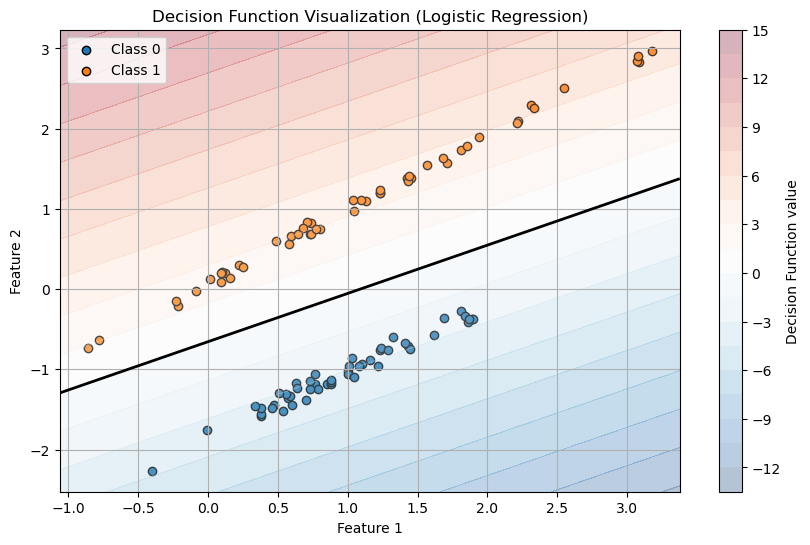

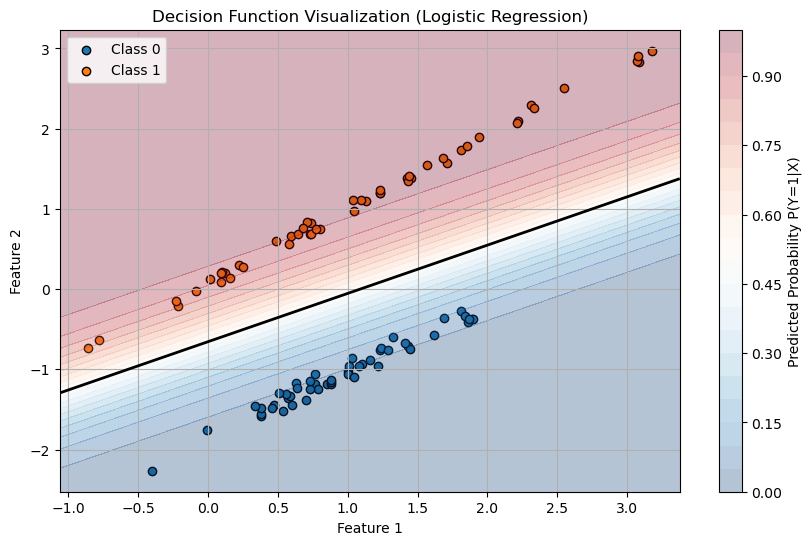

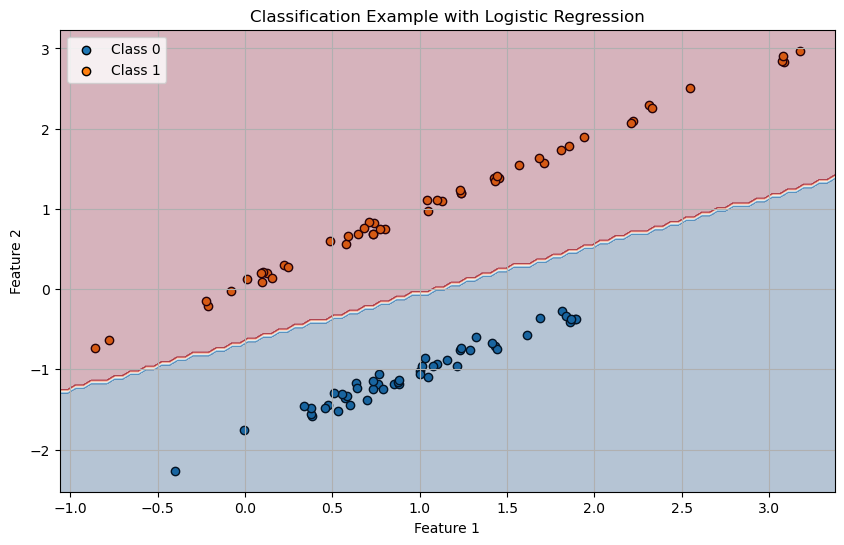

In [18]:

# Generate synthetic classification data
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Fit a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X, y)



# Calculate Decision Function values over the grid
Z_decision = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_decision = Z_decision.reshape(xx.shape)



# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')

# Plot decision boundary and decision function levels
plt.contour(xx, yy, Z_decision, levels=[0], linewidths=2, colors='black')
contour = plt.contourf(xx, yy, Z_decision, alpha=0.3, levels=20, cmap='RdBu_r')
plt.colorbar(contour, label='Decision Function value')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Function Visualization (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


# Plot data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')

# Plot decision boundary and decision function levels
plt.contour(xx, yy, Z_decision, levels=[0], linewidths=2, colors='black')
contour = plt.contourf(xx, yy, Z_proba, alpha=0.3, levels=20, cmap='RdBu_r')
plt.colorbar(contour, label='Predicted Probability P(Y=1|X)')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Function Visualization (Logistic Regression)')
plt.legend()
plt.grid(True)
plt.show()


# Plot the points and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", edgecolor='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", edgecolor='k')

# Decision boundary
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contour = plt.contourf( xx, yy, Z, alpha=0.3, levels=20, cmap='RdBu_r')


# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Example with Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()



- י המודל הלוגיסטי מגדיר גבול לינארי ברור ונו. י  
- י ערך פונקציית ההחלטה מאפשר להבין לא רק לאיזו קבוצה התצפית משתייכת, אלא גם את רמת הביטחון בניבוי. י


## י פונקציית ההחלטה ברגרסיה לוגיסטית מורכבת משני שלבים: י  

### י שלב א' (לינארי): י  

$$
z = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

### י שלב ב' (הפעלת פונקציית סיגמואיד): י  

י השלב הלינארי מועבר דרך פונקציית סיגמואיד שמחזירה הסתברות: י  

$$
P(Y=1|X=x) = \frac{1}{1+e^{-z}} \quad;\quad z = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

י המשמעות היא שכאן התוצאה היא תמיד בין $0$ ל-$1$ ומייצגת הסתברות אמיתית. י  